In [2]:
## Project 2 - Darshan Pai
## Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
## first load the training and the testing data
data_train = pd.read_csv("mitbih_train.csv", header=None)
data_test = pd.read_csv("mitbih_test.csv", header=None)

In [8]:
## Visualize training data
data_train = data_train.rename(columns=lambda x: "Col"+str(x))
data_train = data_train.rename(columns={"Col187": "Label"})
data_train["Label"] = data_train["Label"].astype(np.int16)

data_train.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col178,Col179,Col180,Col181,Col182,Col183,Col184,Col185,Col186,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
## Visualize test data
data_test = data_test.rename(columns=lambda x: "Col"+str(x))
data_test = data_test.rename(columns={"Col187": "Label"})
data_test["Label"] = data_test["Label"].astype(np.int16)
data_test.head()

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col178,Col179,Col180,Col181,Col182,Col183,Col184,Col185,Col186,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
## Get the Label Counts for training data
data_train.Label.value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: Label, dtype: int64

As we see here that that we have an imbalanced dataset. Looking at the proportions within the training dataset.

From https://archive.physionet.org/physiobank/database/html/mitdbdir/intro.htm#annotations, we can interpret the different types of beats via

*   N: Normal beat (0)
*   V: Premature ventricular contraction (1)
*   S: Supraventricular premature beat (2)
*   F: Fusion of ventricular and normal beat (3)
*   Q: Unclassifiable beat (4)

In [36]:
categories = [0, 1, 2, 3, 4]
category_names = ['N', 'S', 'V', 'F', 'Q']
def generate_pie_plot(labels, categories):
    proportions = []
    sz = len(labels)
    for c in range(len(categories)):
        prop = labels.value_counts()[c]
        print(f"Proportion of data in class {c} is {prop} : {prop/sz*100:0.2f} %")
        proportions.append(prop)

    colors = ['#003f5c', '#58508d' , '#bc5090', '#ff6361', '#ffa600']

    fig, ax = plt.subplots()
    ax.pie(proportions, labels=categories, autopct='%1.1f%%', colors = colors, textprops={'color':"gray"})
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    ax.set_title('Categories (Heart beats)', color='gray')

    plt.show()


Proportion of data in class 0 is 72471 : 82.77 %
Proportion of data in class 1 is 2223 : 2.54 %
Proportion of data in class 2 is 5788 : 6.61 %
Proportion of data in class 3 is 641 : 0.73 %
Proportion of data in class 4 is 6431 : 7.35 %


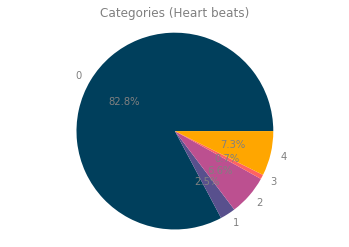

In [23]:
generate_pie_plot(data_train.Label, categories)

In [24]:
## Get the label counts for testing data

data_test.Label.value_counts()

0    18118
4     1608
2     1448
1      556
3      162
Name: Label, dtype: int64

Proportion of data in class 0 is 18118 : 82.76 %
Proportion of data in class 1 is 556 : 2.54 %
Proportion of data in class 2 is 1448 : 6.61 %
Proportion of data in class 3 is 162 : 0.74 %
Proportion of data in class 4 is 1608 : 7.35 %


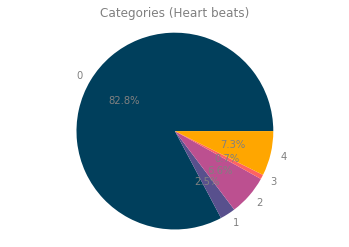

In [25]:
generate_pie_plot(data_test.Label, categories)

In [26]:
## Check for null values for both the training and testing data
data_train.isna().sum()

Col0      0
Col1      0
Col2      0
Col3      0
Col4      0
         ..
Col183    0
Col184    0
Col185    0
Col186    0
Label     0
Length: 188, dtype: int64

In [28]:
data_test.isna().sum()

Col0      0
Col1      0
Col2      0
Col3      0
Col4      0
         ..
Col183    0
Col184    0
Col185    0
Col186    0
Label     0
Length: 188, dtype: int64

From the value counts of the training and testing data we see that the 2 groups are stratified as expected. If it is not stratified, combine, shuffle and split with stratified=y

Now we move on to train different ML models and record the accuracy on the test dataset. 
We start with the baseline model

In [29]:
## Split labels
X_train = data_train.drop(['Label'], axis=1)
Y_train = data_train['Label']

X_test = data_test.drop(['Label'], axis=1)
Y_test = data_test['Label']

In [58]:
## Start with Baseline model .
## Baseline accuracy assumes a model that will give the result of Class 0 for all input.
print(f"Baseline Accuracy on test data is {data_test.Label.value_counts()[0]/len(data_test.Label)}")

Baseline Accuracy on test data is 0.8276082587246483


In [32]:
## Logistic Regression Model
from warnings import simplefilter
simplefilter("ignore")
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
cv_score = cross_val_score(model, X_train, Y_train, cv=5)
print(cv_score)
print(cv_score.mean())

[0.9089715  0.91462509 0.91405402 0.91045628 0.91496288]
0.9126139565173703


The cross validation score is very high for this dataset. So we can expect it to generalize well

In [55]:
# visualize the Accuracy and confusion matrix for a given model
#confusion_matrix(Y_test, y_predicted, labels=categories)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

def Accuracy_ConfusionMatrix(model, y_test):
    y_predicted= model.predict(X_test)
    print(f"Accuracy on the Logistic Regression is {accuracy_score(Y_test, y_predicted)}")
    confusion_matrix = pd.crosstab(Y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
    print(confusion_matrix)
    print("Sensitivity of model for individual classes")
    class_sum = np.sum(confusion_matrix, axis=1)
    for c in categories:
        print(f"Class {c} : {confusion_matrix[c][c]/class_sum[c]}")

In [56]:
# train the classifier and evaluate the performance in the test set
model.fit(X_train, Y_train)

LogisticRegression()

In [57]:
## Accuracy and Confusion Matrix for Logistic Regression
Accuracy_ConfusionMatrix(model, Y_test)

Accuracy on the Logistic Regression is 0.91174858395761
Predicted      0    1    2   3     4
Actual                              
0          17832   25  209  13    39
1            327  197   32   0     0
2            899   11  484  26    28
3            107    0    8  47     0
4            186    0   22   0  1400
Sensitivity of model for individual classes
Class 0 : 0.9842145932222099
Class 1 : 0.35431654676258995
Class 2 : 0.3342541436464088
Class 3 : 0.29012345679012347
Class 4 : 0.8706467661691543


The accuracy for Logistic Regression is high - 0.92. However, when split into individual classes, it shows that sensitivity to class 0 is the highest at 0.98. Class 4 also gives good result. But prediction on Class 1, 2, and 3 is poor. The accuracy is dominated by Class 0. However, it does well when compared with the baseline model accuracy of 0.82.

In [60]:
## SVM model
from sklearn.svm import SVC

SVMmodel = SVC(kernel='rbf') 

SVMmodel.fit(X_train, Y_train)

SVC()

In [61]:
## Accuracy and Confusion Matrix for SVM
Accuracy_ConfusionMatrix(SVMmodel, Y_test)

Accuracy on the Logistic Regression is 0.9680248492600037
Predicted      0    1     2   3     4
Actual                               
0          18086   10    17   1     4
1            237  314     5   0     0
2            170    2  1249  25     2
3             71    0    13  78     0
4            135    0     8   0  1465
Sensitivity of model for individual classes
Class 0 : 0.9982338006402472
Class 1 : 0.564748201438849
Class 2 : 0.8625690607734806
Class 3 : 0.48148148148148145
Class 4 : 0.9110696517412935


The accuracy for SVM Model with the RBF kernel has improved over Logistic Regression with a value 0.96. When split into individual classes, it also shows that sensitivity to class 0 is the highest at 0.99. Class 4 has also improved overall. But predictions on Class 1, 2, and 3 is much higher than Logistic Regrssion. 
It also has good performance when compared with the baseline model accuracy of 0.82.

In [62]:
## SVM model with linear kernel
SVMmodellinear = SVC(kernel='linear') 

SVMmodellinear.fit(X_train, Y_train)

SVC(kernel='linear')

In [63]:
Accuracy_ConfusionMatrix(SVMmodellinear, Y_test)

Accuracy on the Logistic Regression is 0.9204275534441805
Predicted      0    1    2   3     4
Actual                              
0          18036   23   51   0     8
1            282  257   17   0     0
2           1003    0  404  30    11
3            102    0    5  55     0
4            196    1   13   0  1398
Sensitivity of model for individual classes
Class 0 : 0.9954741141406336
Class 1 : 0.46223021582733814
Class 2 : 0.27900552486187846
Class 3 : 0.3395061728395062
Class 4 : 0.8694029850746269


SVM with a linear model gives a very similar result to Logistic Regression

In [64]:
# check performance for ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
GBModel = GradientBoostingClassifier() 
GBModel.fit(X_train, Y_train)

GradientBoostingClassifier()

In [65]:
Accuracy_ConfusionMatrix(GBModel, Y_test)

Accuracy on the Logistic Regression is 0.9642335099579755
Predicted      0    1     2   3     4
Actual                               
0          18036   18    37  11    16
1            226  323     5   0     2
2            229    3  1185  25     6
3             68    1    13  80     0
4            119    1     3   0  1485
Sensitivity of model for individual classes
Class 0 : 0.9954741141406336
Class 1 : 0.5809352517985612
Class 2 : 0.8183701657458563
Class 3 : 0.49382716049382713
Class 4 : 0.9235074626865671


Gradient Boosting has a similar performance when compared with SVM with a rbf kernel. It also does better than Logistic Regression on all classes. It has an accuracy of 0.96.

In [66]:
RanForestModel = RandomForestClassifier() 
RanForestModel.fit(X_train, Y_train)

RandomForestClassifier()

In [67]:
Accuracy_ConfusionMatrix(RanForestModel, Y_test)

Accuracy on the Logistic Regression is 0.9744655581947743
Predicted      0    1     2    3     4
Actual                                
0          18102    5     9    0     2
1            220  334     1    0     1
2            148    2  1278   14     6
3             49    0    13  100     0
4             87    0     2    0  1519
Sensitivity of model for individual classes
Class 0 : 0.9991169003201237
Class 1 : 0.6007194244604317
Class 2 : 0.8825966850828729
Class 3 : 0.6172839506172839
Class 4 : 0.9446517412935324


Random Forest model gives the best result of all the models. It has a higher overall accuracy of 0.97. This improvement all shows in the performance of all the classes. Performance for Class 1 and 3 are over 60 %.

Summary:
|  Model               | Accuracy  | Time To Run |
|----------------------|-----------|-------------|
|  Logistic Regrission |   0.92    | 4.7 s       |
|  SVC (RBF)           |   0.968   | 5 m 2 s     |
|  Gradient Boost      |   0.964   | 20 m        |
|  Random Forest       |   0.974   | 1 m 2 s     |